# Standard Deviation and Correlation


> 2013/14 NBA player stats: totals
source : https://www.basketball-reference.com/leagues/NBA_2014_totals.html


Here are some of the interesting columns:

* `player` - The player's name
* `pts` - The total number of points the player scored
* `ast` - The player's total number of assists
* `fg.` - The player's field goal percentage for the season

On the next few screens, we'll explore this data set by calculating a few summary statistics.




In [13]:
import pandas as pd

In [14]:
nba_stats = pd.read_csv('data/201314-nba-playerstats-totals.csv', sep=',')

In [15]:
nba_stats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy\acyqu01,SF,23,TOT,63,0,847,66,141,...,0.660,72,144,216,28,23,26,30,122,171
1,1,Quincy Acy\acyqu01,SF,23,TOR,7,0,61,6,14,...,0.625,5,10,15,4,4,3,2,8,19
2,1,Quincy Acy\acyqu01,SF,23,SAC,56,0,786,60,127,...,0.667,67,134,201,24,19,23,28,114,152
3,2,Steven Adams\adamsst01,C,20,OKC,81,20,1197,93,185,...,0.581,142,190,332,43,40,57,71,203,265
4,3,Jeff Adrien\adrieje01,PF,27,TOT,53,12,961,143,275,...,0.639,102,204,306,38,24,36,39,108,362


In [16]:
nba_stats.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

### Finding Variance

Let's look at variance in the data. Variance tells us how concentrated or "spread out" the data is around the mean.<br>

We looked at kurtosis earlier, which measures the shape of a distribution. Variance directly measures how far the average data point is from the mean.<br>

We calculate variance by subtracting every value from the mean, squaring the results, and then averaging them. Mathemically, this looks like this:

$$ 
\sigma^2 =
\frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu _x)^2} {n}
$$

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# We've already loaded the NBA data into the nba_stats variable.
# Find the mean value of the column.
PF_mean = nba_stats["PF"].mean()

# Initialize variance at zero.
variance = 0

# Loop through each item in the "PF" column.
for p in nba_stats["PF"]:
    
    # Calculate the difference between the mean and the value.
    difference = p - PF_mean
    
    # Square the difference. This ensures that the result isn't negative.
    # If we didn't square the difference, the total variance would be zero.
    # ** in python means "raise whatever comes before this to the power of whatever number is after this."
    square_difference = difference ** 2
    
    # Add the difference to the total.
    variance += square_difference

# Average the total to find the final variance.
pf_variance = variance / len(nba_stats["PF"])

In [19]:
pf_variance

5043.3537036491389

In [20]:
PTS_mean = nba_stats["PTS"].mean()

variance = 0

for p in nba_stats["PTS"]:
    
    difference = p - PTS_mean
    square_difference = difference ** 2
    variance += square_difference

point_variance = variance / len(nba_stats["PTS"])

In [21]:
point_variance

203512.38304836844

### Calculating Standard Deviation

**Standard deviation** is the most common way to refer to the distance between data points and the mean. It's a very useful concept and a great way to measure the density of a data set.

$$\sigma =
\sqrt{\frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu _x)^2} {n}}$$

In [24]:
def cal_std(df, col):
    
    col_mean = df[col].mean()
    var = 0
    
    for p in df[col]:
        
        diff = p - col_mean
        sqrd_diff = diff ** 2
        var += sqrd_diff
    
    return (var / len(df[col]))**(1/2)
    

In [26]:
mp_dev = cal_std(nba_stats, 'MP')
ast_dev = cal_std(nba_stats, 'AST')

In [27]:
print(mp_dev, ast_dev)

885.510773619 122.682937146


### Finding Standard Deviation Distance

The standard deviation is very useful because it lets us compare the points in a distribution to the mean.

* We can say that a certain point is **"two standard deviations away from the mean,"** for example. This gives us a way to compare data density across different charts.

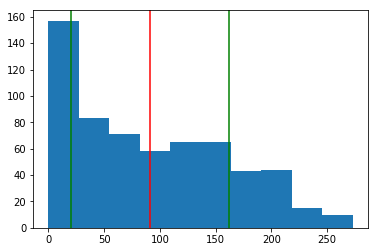

In [28]:
import matplotlib.pyplot as plt

plt.hist(nba_stats["PF"])
mean = nba_stats["PF"].mean()
plt.axvline(mean, color="r")
# We can calculate standard deviation by using the std() method on a pandas series.
std_dev = nba_stats["PF"].std()
# Plot a line one standard deviation below the mean.
plt.axvline(mean - std_dev, color="g")
# Plot a line one standard deviation above the mean.
plt.axvline(mean + std_dev, color="g")

# We can see how many of the data points fall within one standard deviation of the mean.
# The more that fall into this range, the more dense the data is.
plt.show()

# We can calculate how many standard deviations a data point is from the mean by doing some subtraction and division.
# First, we find the total distance by subtracting the mean.
total_distance = nba_stats["PF"][0] - mean
# Then we divide by standard deviation to find how many standard deviations away the point is.
standard_deviation_distance = total_distance / std_dev

point_10 = nba_stats["PF"][9]
point_100 = nba_stats["PF"][99]

In [30]:
point_10_std = (point_10 - nba_stats['PF'].mean()) / std_dev
point_10_std

-0.72091629433534377

In [31]:
point_100_std = (point_100 - nba_stats['PF'].mean()) / std_dev
point_100_std

1.3895375458867869

### Working with the Normal Distribution

The normal distribution is a special kind of distribution. You might recognize it more commonly as a bell curve. <br>

The normal distribution is found in a variety of natural phenomena. If we made a histogram of the heights of everyone on the planet, for example, it would be more or less a normal distribution. <br>

We can generate a normal distribution by using a probability density function.

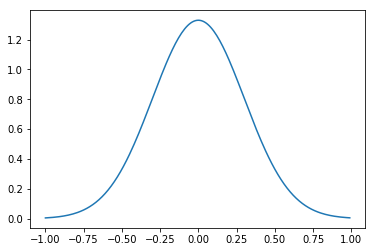

In [32]:
import numpy as np
import matplotlib.pyplot as plt
# The norm module has a pdf function (pdf stands for probability density function)
from scipy.stats import norm

# The arange function generates a numpy vector
# The vector below will start at -1, and go up to, but not including 1
# It will proceed in "steps" of .01.  So the first element will be -1, the second -.99, the third -.98, all the way up to .99.
points = np.arange(-1, 1, 0.01)

# The norm.pdf function will take the points vector and convert it into a probability vector
# Each element in the vector will correspond to the normal distribution (earlier elements and later element smaller, peak in the center)
# The distribution will be centered on 0, and will have a standard devation of .3
probabilities = norm.pdf(points, 0, .3)

# Plot the points values on the x-axis and the corresponding probabilities on the y-axis
# See the bell curve?
plt.plot(points, probabilities)
plt.show()

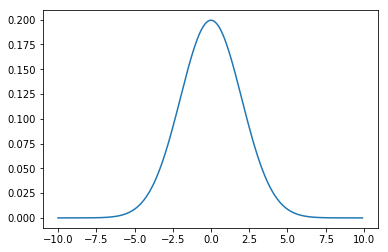

In [33]:
# (0, 2) normal distribution

pts = np.arange(-10, 10, .1)
probs = norm.pdf(pts, 0, 2)
plt.plot(pts, probs)
plt.show()

### Normal Distribution Deviation

One cool thing about normal distributions is that for every single one, the same percentage of the data is within one standard deviation of the mean, the same percentage is within two standard deviations of the mean, and so on.

* About 68% of the data is within one standard deviation, roughly 95% is within two standard deviations, and about 99% is within three standard deviations.

In [34]:
# Housefly wing lengths in millimeters
wing_lengths = [36, 37, 38, 38, 39, 39, 40, 40, 40, 
                40, 41, 41, 41, 41, 41, 41, 42, 42, 
                42, 42, 42, 42, 42, 43, 43, 43, 43, 
                43, 43, 43, 43, 44, 44, 44, 44, 44, 
                44, 44, 44, 44, 45, 45, 45, 45, 45, 
                45, 45, 45, 45, 45, 46, 46, 46, 46, 
                46, 46, 46, 46, 46, 46, 47, 47, 47, 
                47, 47, 47, 47, 47, 47, 48, 48, 48, 
                48, 48, 48, 48, 48, 49, 49, 49, 49, 
                49, 49, 49, 50, 50, 50, 50, 50, 50, 
                51, 51, 51, 51, 52, 52, 53, 53, 54, 
                55]

In [35]:
wing_lengths = pd.Series(wing_lengths)

mean_wing_lengths = wing_lengths.mean()
std_wing_lengths = wing_lengths.std()

dist_from_mean_wing_lengths = (wing_lengths - mean_wing_lengths) / std_wing_lengths

within_one_percentage = dist_from_mean_wing_lengths\
                        [abs(dist_from_mean_wing_lengths) <= 1]
    
within_two_percentage = dist_from_mean_wing_lengths\
                        [abs(dist_from_mean_wing_lengths) <= 2]
    
within_three_percentage = dist_from_mean_wing_lengths\
                        [abs(dist_from_mean_wing_lengths) <= 3]


### Using Scatterplots to Plot Correlations

Much of statistics deals with analyzing how variables impact each other, and the first step is to graph them out with a scatterplot. <br>

While graphing them out, we can look at correlation. If two variables change together (ie, when one goes up, the other goes up), we know that they are correlated.

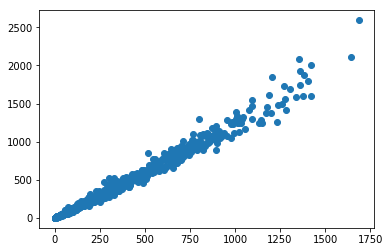

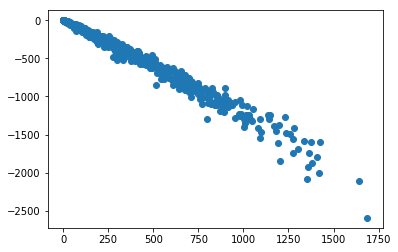

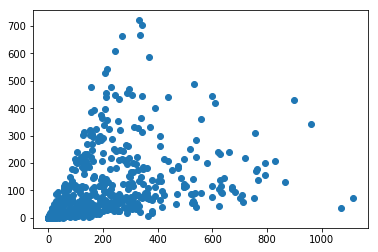

In [37]:
import matplotlib.pyplot as plt

# Plot field goals attempted (number of shots someone takes in a season) vs. point scored in a season.
# Field goals attempted is on the x-axis, and points is on the y-axis.
# As you can tell, they are very strongly correlated. The plot is close to a straight line.
# The plot also slopes upward, which means that as field goal attempts go up, so do points.
# That means that the plot is positively correlated.
plt.scatter(nba_stats["FGA"], nba_stats["PTS"])
plt.show()

# If we make points negative (so the people who scored the most points now score the least, because 3000 becomes -3000), we can change the direction of the correlation.
# Field goals are negatively correlated with our new "negative" points column -- the more free throws you attempt, the less negative points you score.
# We can see this because the correlation line slopes downward.
plt.scatter(nba_stats["FGA"], -nba_stats["PTS"])
plt.show()

# Now, we can plot total rebounds (number of times someone got the ball back for their team after someone shot) vs total assists (number of times someone helped another person score).
# These are uncorrelated, so you don't see the same nice line as you see with the plot above.
plt.scatter(nba_stats["TRB"], nba_stats["AST"])
plt.show()

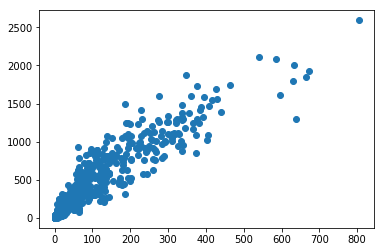

In [38]:
plt.scatter(nba_stats['FTA'], nba_stats['PTS'])
plt.show()

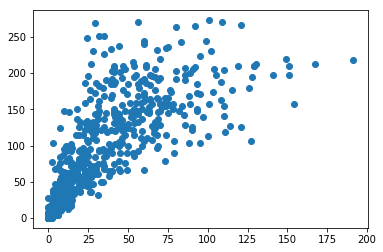

In [39]:
plt.scatter(nba_stats['STL'], nba_stats['PF'])
plt.show()

### Measuring Correlation with Pearson's r

Measuring correlation can be a big help when we need to analyze a lot of variables. This spares us from having to eyeball everything. <br>

The most common way to measure correlation is to use **Pearson's r**, which we also call an **r-value**.<br>

We'll explore how the calculations work later. For now, though, we'll focus on the values. <br>

* An r-value ranges from -1 to 1, and indicates how strongly two variables are correlated.
  * A 1 indicates a perfect positive correlation. This would appear as a straight, upward-sloping line on our plots.
  * A 0 indicates no correlation. We'd see a scatterplot with points that appear random.
  * A -1 indicates a perfect negative correlation. This would appear as a straight, downward-sloping line.

Any correlation between -1 and 0 will show up as a scattering of points. The same is true of correlations falling between 0 and 1. The closer the value is to 0, the more random the points will appear. The closer it is to -1 or 1, the more "line-like" the points will appear. <br>

We can use a function from scipy to calculate Pearson's r.

In [41]:
from scipy.stats.stats import pearsonr

# The pearsonr function will find the correlation between two columns of data.
# It returns the r value and the p value.  We'll learn more about p values later on.
r, p_value = pearsonr(nba_stats["FGA"], nba_stats["PTS"])
# As we can see, this is a very high positive r value - it's close to 1.
print(r)

# These two columns are much less correlated.
r, p_value = pearsonr(nba_stats["TRB"], nba_stats["AST"])
# We get a much lower, but still positive, r value.
print(r)

0.990412723627
0.424278516292


In [42]:
r_fta_pts, p_value = pearsonr(nba_stats['FTA'], nba_stats['PTS'])
r_stl_pf, p_value = pearsonr(nba_stats['STL'], nba_stats['PF'])

In [43]:
print(r_fta_pts, r_stl_pf)

0.9247142802 0.77382931075


### Calculate Covariance

Another way to think of correlation is in terms of variance.<br>

Two variables are correlated when they both vary individually, but in similar ways. For example, correlation occurs when if one variable goes up, another variable also goes up.<br>

This is called covariance. Covariance refers to how different numbers vary jointly.<br>

There's **a limit to how much two variables can co-vary. This is because each variable has its own variance.** These individual variances set a maximum theoretical limit on the covariance between two variables. In other words, a set of variables can't co-vary more from the mean than the two variables individually vary from the mean. <br>

* Two variables reach the maximum possible covariance when they vary in an identical way (ie, you see a straight line on the plot).

* The r-value is a ratio between the actual covariance and the maximum possible positive covariance.

Let's look at actual covariance first. Mathematically speaking, covariance between two variables looks like this:

$$cov(\mathbf{x},\mathbf{y})=
\frac{\sum_{i=1}^{n}(x_i-\mu _x)(y_i-\mu _y)}{n}$$

For each element in the vectors x and y, we:

* Take the value at each position from 1 to the length of the vectors.
* Subtract the mean of the vector from those values.
* Multiply them together at each position, and all of the resulting values together.

In [44]:
def calc_covariance(df, col1, col2):
    
    return (df[col1]-df[col1].mean())*\
            (df[col2]-df[col2].mean()).sum()\
            / len(df[col1])
    
cov_stl_pf = calc_covariance(nba_stats, 'STL', 'PF')
cov_fta_pts = calc_covariance(nba_stats, 'FTA', 'PTS')

### Calculate Correlation With the std() method

Now that we know how to calculate covariance, we can get the **correlation coefficient** using the following formula:

$\frac{cov(\mathbf{x},\mathbf{y})}{\sigma_{x}\sigma_{y}}$

For the denominator, we need to multiply the standard deviations for x and y. This is the maximum possible positive covariance, which is just both of the standard deviation values multiplied. If we divide our actual covariance by this, we get the r-value. <br>

We can use the `std` method on any pandas DataFrame or Series to calculate the standard deviation. The following code returns the standard deviation for the `pf` column:

`nba_stats['PF'].std()`

We can use the `cov` function from NumPy to compute covariance, returning a 2x2 matrix. The following code returns the covariance between the `pf` and `stl` columns:

```python
cov(nba_stats['PF'], nba_stats['STL'])[0,1]
```

In [47]:
from numpy import cov

r_fta_blk = cov(nba_stats['FTA'], nba_stats['BLK'])[0,1]\
            /(nba_stats['FTA'].std() * nba_stats['BLK'].std())
r_ast_stl = cov(nba_stats['AST'], nba_stats['STL'])[0,1]\
            /(nba_stats['AST'].std() * nba_stats['STL'].std())

In [48]:
print(r_fta_blk, r_ast_stl)

0.491784538478 0.784482863176
